# Kaggle
## Digit Recognizer

Author: Vinícius Hiroshi Higa

In [ ]:
!kaggle competitions download -c digit-recognizer

In [18]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [25]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
row_size = train_df.iloc[0].shape
row_size = int(row_size[0]) - 1 # We need to subtract -1 to remove the label column
img_size = int(math.sqrt(row_size))
print("Image size: " + str(img_size) + "x" + str(img_size))

Image size: 28x28


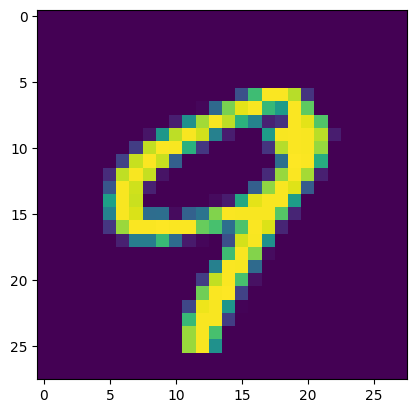

In [27]:
example_row = train_df.iloc[100]
example_row = example_row[1:]
example_row = np.array(example_row, dtype=np.uint8)
example_img = example_row.reshape((img_size, img_size))

plt.imshow(example_img)

In [28]:
# Get one hot encoding of columns LABEL
one_hot = pd.get_dummies(train_df['label'])
# Drop column B as it is now encoded
train_df = train_df.drop('label',axis = 1)
# Join the encoded df
train_df = train_df.join(one_hot)

train_df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [54]:
X = train_df.iloc[: , 0:784]
y = train_df.iloc[: , 784:794]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print("Training data size: " + str(X_train.shape[0]))

Training data size: 28140


# Creating the model

In [127]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(img_size * img_size,)),
    tf.keras.layers.Dense(256, activation='ReLU'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(128, activation='ReLU'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation='softmax'),
])

model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=[tf.keras.metrics.CategoricalAccuracy()])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 256)               200960    
                                                                 
 batch_normalization_11 (Bat  (None, 256)              1024      
 chNormalization)                                                
                                                                 
 dense_25 (Dense)            (None, 128)               32896     
                                                                 
 batch_normalization_12 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 dense_26 (Dense)            (None, 10)                1290      
                                                                 
Total params: 236,682
Trainable params: 235,914
Non-tr

In [128]:
model.fit(x=X_train, y=y_train, batch_size=1000, epochs=100, verbose=2)

Epoch 1/100
29/29 - 1s - loss: 0.6166 - categorical_accuracy: 0.8126 - 841ms/epoch - 29ms/step
Epoch 2/100
29/29 - 0s - loss: 0.1962 - categorical_accuracy: 0.9454 - 154ms/epoch - 5ms/step
Epoch 3/100
29/29 - 0s - loss: 0.1319 - categorical_accuracy: 0.9644 - 140ms/epoch - 5ms/step
Epoch 4/100
29/29 - 0s - loss: 0.0966 - categorical_accuracy: 0.9751 - 150ms/epoch - 5ms/step
Epoch 5/100
29/29 - 0s - loss: 0.0723 - categorical_accuracy: 0.9822 - 149ms/epoch - 5ms/step
Epoch 6/100
29/29 - 0s - loss: 0.0549 - categorical_accuracy: 0.9884 - 152ms/epoch - 5ms/step
Epoch 7/100
29/29 - 0s - loss: 0.0406 - categorical_accuracy: 0.9925 - 141ms/epoch - 5ms/step
Epoch 8/100
29/29 - 0s - loss: 0.0327 - categorical_accuracy: 0.9945 - 148ms/epoch - 5ms/step
Epoch 9/100
29/29 - 0s - loss: 0.0225 - categorical_accuracy: 0.9976 - 146ms/epoch - 5ms/step
Epoch 10/100
29/29 - 0s - loss: 0.0172 - categorical_accuracy: 0.9988 - 147ms/epoch - 5ms/step
Epoch 11/100
29/29 - 0s - loss: 0.0140 - categorical_accur

Epoch 86/100
29/29 - 0s - loss: 2.3802e-04 - categorical_accuracy: 1.0000 - 146ms/epoch - 5ms/step
Epoch 87/100
29/29 - 0s - loss: 2.4071e-04 - categorical_accuracy: 1.0000 - 135ms/epoch - 5ms/step
Epoch 88/100
29/29 - 0s - loss: 2.1662e-04 - categorical_accuracy: 1.0000 - 145ms/epoch - 5ms/step
Epoch 89/100
29/29 - 0s - loss: 2.0003e-04 - categorical_accuracy: 1.0000 - 148ms/epoch - 5ms/step
Epoch 90/100
29/29 - 0s - loss: 1.8650e-04 - categorical_accuracy: 1.0000 - 138ms/epoch - 5ms/step
Epoch 91/100
29/29 - 0s - loss: 1.7122e-04 - categorical_accuracy: 1.0000 - 143ms/epoch - 5ms/step
Epoch 92/100
29/29 - 0s - loss: 1.6244e-04 - categorical_accuracy: 1.0000 - 151ms/epoch - 5ms/step
Epoch 93/100
29/29 - 0s - loss: 1.5260e-04 - categorical_accuracy: 1.0000 - 141ms/epoch - 5ms/step
Epoch 94/100
29/29 - 0s - loss: 1.4438e-04 - categorical_accuracy: 1.0000 - 141ms/epoch - 5ms/step
Epoch 95/100
29/29 - 0s - loss: 1.3936e-04 - categorical_accuracy: 1.0000 - 140ms/epoch - 5ms/step
Epoch 96/1

In [129]:
results = model.evaluate(X_test, y_test, batch_size=128)
results

109/109 [==============================] - 0s 2ms/step - loss: 0.0972 - categorical_accuracy: 0.9772


[0.09718490391969681, 0.9772005677223206]

# Test Dataset

In [130]:
test_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [131]:
results = model.predict(x=test_df)

875/875 [==============================] - 1s 1ms/step


In [132]:
predictions_df = pd.DataFrame(columns=['ImageId','Label'])

In [133]:
index = 1
for prediction in results:
    label = np.argmax(prediction)
    predictions_df = pd.concat([predictions_df, pd.DataFrame.from_records([{'ImageId': index, 'Label': str(label)}])])
    index += 1

In [134]:
predictions_df

,ImageId,Label
0,1,2
0,2,0
0,3,9
0,4,9
0,5,3
...,...,...
0,27996,9
0,27997,7
0,27998,3
0,27999,9


In [135]:
predictions_df.to_csv('results.csv', index=False)